# Label Characteristics

In [1]:
import sys
sys.path.append('../../libs')

import numpy as np
import random
import csv

import dataset

In this task, we want to analyse the labels for our machine learning task. We have:
- 10 keywords we want to identify
- Labels for recordings of 20 different words
- Everyday scenes with/without speech


## Speech / No-Speech classification

First, we can classify the audio samples into speech and no-speech. Samples with speech are labelled as `1` and samples without are labelled as `0`.

This means that:
- All recordings of the 20 different words get a `1`
- All recordings of "Other" with `speech_false` get a `0`
- All recordings of "Other" with `speech_true` are unused, since we are not sure which samples have speech

### Label Distribution

- Speech False: 846
- Speech True: 40834

We have much more samples with speech than samples without. 

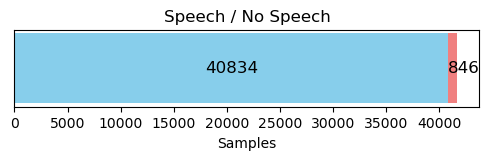

In [2]:
import matplotlib.pyplot as plt


# Example numbers
numbers = [40834, 846]

fig, ax = plt.subplots(figsize=(6, 1))

ax.barh(0, numbers[0], color='skyblue')
ax.barh(0, numbers[1], left=numbers[0], color='lightcoral')

ax.set_xlabel('Samples')

ax.get_yaxis().set_visible(False)

ax.set_title("Speech / No Speech")

ax.text(numbers[0]/2, 0, str(numbers[0]), color='black', ha='center', va='center', fontsize=12)

ax.text(numbers[0] + numbers[1]/2+1000, 0, str(numbers[1]), color='black', ha='center', va='center', fontsize=12)

plt.show()

## Command classification

We want to know whether a short audio segment contains a keyword and not just any speech. 

We have 10 different keyword, therefore a one-hot encoding seems easily feasible. A classification for an audio sample consists of 10 numbers between 0 and 1, one for each keyword. Each number represents our degree of belief that the audio sample has its corresponding keyword in it.

Let's say we order the keywords in this manner:
1. Fernseher (TV)
2. Heizung (heating)
3. Licht (lights)
4. Lüftung (ventilation)
5. Ofen (oven)
6. Alarm (alarm)
7. Radio (radio)
8. Staubsauger (vacuum cleaner)
9. an (on)
10. aus (off)

For a sample with the keyword "Licht", its classification would be `[0 0 1 0 0 0 0 0 0 0]`. For the word "Staubsauger", its `[0 0 0 0 0 0 0 1 0 0]`. If a sample has no keyword in it, its classification is `[0 0 0 0 0 0 0 0 0 0]`.

This means that:
- All recordings of the 20 different words get a classification with a single `1`.
- All recordings of "Other" with `speech_false` get a classification of only `0`s. 
- All recordings of "Other" with `speech_true` are unused, since we are not sure which samples have which keyword.

### Label Distribution

- "brötchen": 2038
- "kann": 2038
- "staubsauger": 2038
- "spiegel": 2040
- "alarm": 2042
- "lüftung": 2045
- "ofen": 2044
- "haus": 2042
- "heizung": 2036
- "fernseher": 2046
- "schraube": 2046
- "licht": 2044
- "aus": 2041
- "nicht": 2045
- "warm": 2040
- "an": 2041
- "leitung": 2045
- "offen": 2039
- "wunderbar": 2042
- "radio": 2042
- no keyword: 846 

The keyword labels are almost equally distributed, but we do have less samples with no keywords.

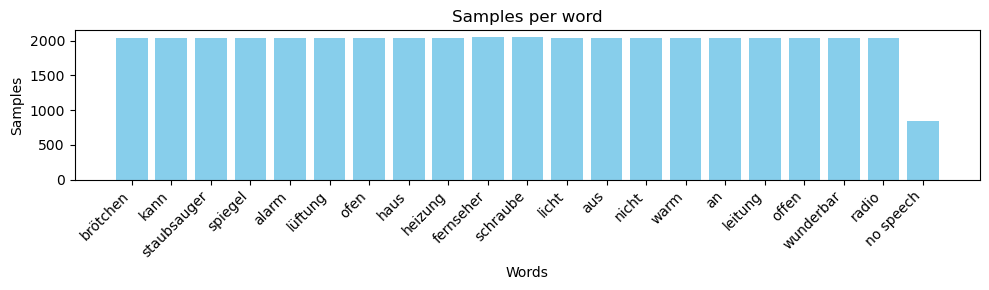

In [15]:
classifications = {}

for key, value in dataset.labels().items():
    if key == "other":
        classifications["no speech"] = len(list(filter(lambda x: "speech_false" in x["filename"], value)))
    else:
        classifications[key] = len(value)

class_names = classifications.keys()
entity_counts = classifications.values()

# Plotting
plt.figure(figsize=(10, 3))
plt.bar(class_names, entity_counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Samples')
plt.title('Samples per word')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

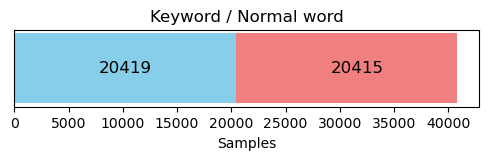

In [18]:
keywords = set(["heizung", "licht", "lüftung", "ofen", "fernseher", "alarm", "radio", "staubsauger", "an", "aus"])

keywords_n = 0 
words_n = 0

for key, value in classifications.items():
    if key == "no speech":
        continue
    if key in keywords:
        keywords_n += value
    else:
        words_n += value

numbers = [keywords_n, words_n]

fig, ax = plt.subplots(figsize=(6, 1))

ax.barh(0, numbers[0], color='skyblue')
ax.barh(0, numbers[1], left=numbers[0], color='lightcoral')

ax.set_xlabel('Samples')

ax.get_yaxis().set_visible(False)

ax.set_title("Keyword / Normal word")

ax.text(numbers[0]/2, 0, str(numbers[0]), color='black', ha='center', va='center', fontsize=12)

ax.text(numbers[0] + numbers[1]/2+1000, 0, str(numbers[1]), color='black', ha='center', va='center', fontsize=12)

plt.show()




In [19]:

speech_false = 0
speech_true = 0

for key, value in dataset.labels().items():
    if key == "other":
        speech_false += len(list(filter(lambda x: "speech_false" in x["filename"], value)))
    else:
        speech_true += len(value)

print(speech_false, speech_true)

846 40834
